In [36]:
import scipy
import numpy as np
from tools import *
import seaborn as sns; sns.set_theme()
sns.set(rc={'figure.figsize':(14,10)})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import scipy.io

def read_lmc(file):
    data = np.array(scipy.io.loadmat(f'./lmc/{file}')['DATAFILE'])
    ress = data[:, ::2]
    stims = data[:, 1::2]
    ress = np.swapaxes(ress, 0, 1)
    stims = np.swapaxes(stims, 0, 1)
    return ress, stims

In [38]:
resPH, stimPH = read_lmc('PHOTO')
res3, stim3 = read_lmc('LMC-BG3')
res4, stim4 = read_lmc('LMC-BG4')
res5, stim5 = read_lmc('LMC-BG5')
res6, stim6 = read_lmc('LMC-BG6')


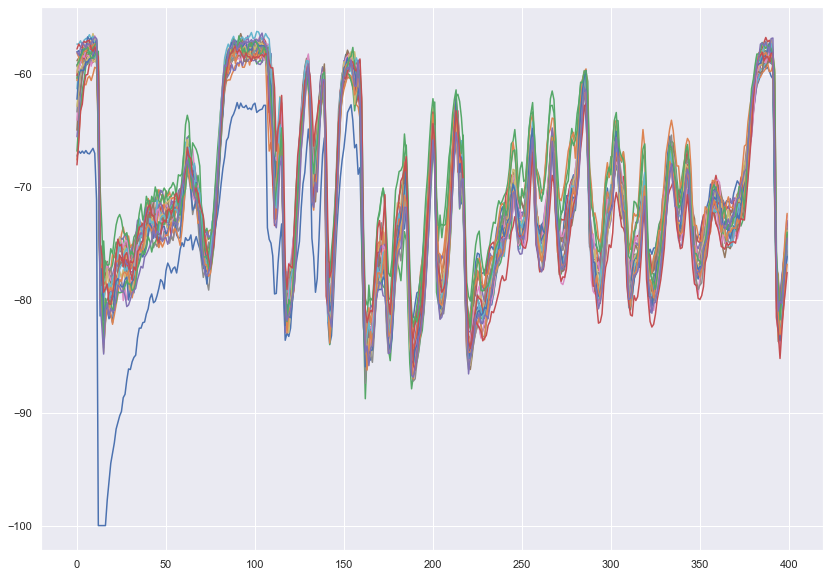

In [39]:
downsample = 25
ress_down = res4[:, ::downsample]
[plt.plot(cur) for cur in ress_down]
plt.show()

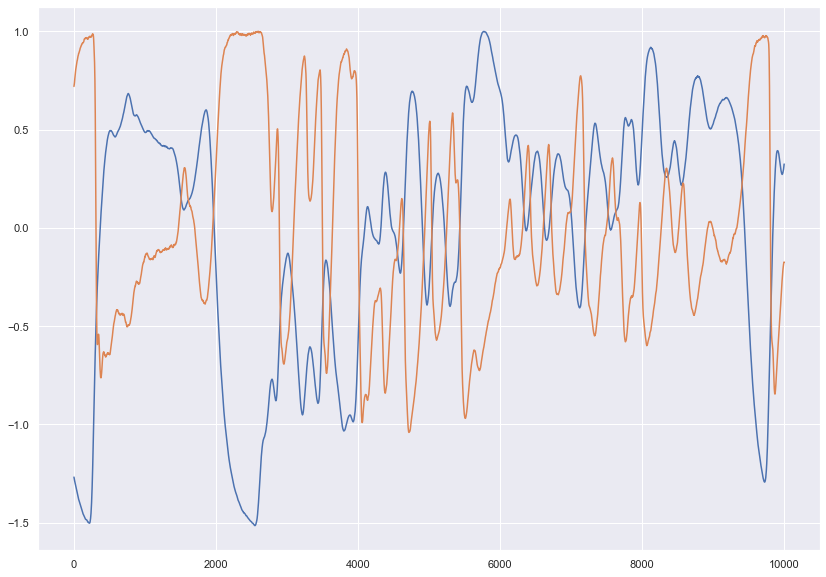

In [67]:
# stim_norm = normalize(np.mean(stim4, axis=0)) 
# plt.plot(stim_norm)

resPH_norm = normalize(np.mean(resPH, axis=0)) 
plt.plot(resPH_norm)

res4_norm = normalize(np.mean(res4, axis=0)) 
plt.plot(res4_norm)
plt.show()




In [98]:
# take sig down sample
down = 10
sig = resPH_norm[::down]

T = len(sig) # total time
r = T // 2 # length of lag vector
L = T-r-1  # number of lag vectors

X1, X2 = np.zeros((r,r)), np.zeros((r,r)) # init X1 = <x_t+1, x_t.T> and X2 = <x_t, x_t.T>
for i in range(L):
    xt = np.expand_dims(sig[i:i+r], axis=1)
    xt1 = np.expand_dims(sig[i+1:i+r+1], axis=1)
    X1 += (xt1 @ xt.T) / L # compute <x_t+1, x_t.T>, averaging over time
    X2 += (xt @ xt.T) / L  # compute <x_t, x_t.T>, averaging over time 
print(X1.shape, X2.shape)

A = X1 @ (np.linalg.inv(X2)) # compute A = <x_t+1, x_t.T> <x_t, x_t.T>^-1


(500, 500) (500, 500)


<ipython-input-99-f8b070ac2efb>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = v @ sig[i:i+r]


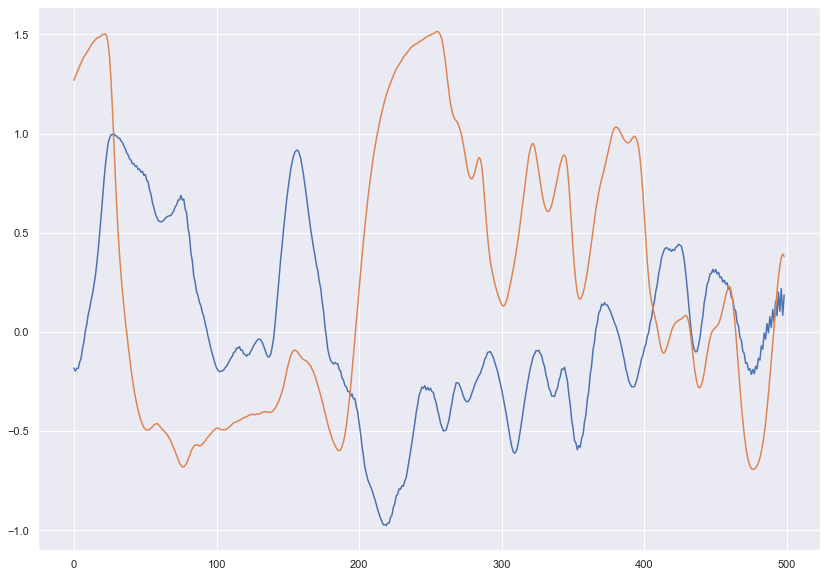

In [99]:
W, Vl, Vr = scipy.linalg.eig(A, left=True) # get left eigenvectors if A (Vl)
# project time serires onto top left eigenvector of A
y = np.zeros(L) # y is new time seriest
v = Vl[:,0].T # top left eigenvector of A
for i in range(L):
    y[i] = v @ sig[i:i+r]

# plot y and compare to neuron response  
plt.plot(normalize(y))
plt.plot(resPH_norm[::down][:L]*-1)
plt.show()

In [121]:
down = 2
sig = resPH_norm[::down]

T = len(sig) # total time
r = T // 10 # length of lag vector
L = T -r
H = build_hankel(sig, r)
A, U, V = HAVOK(H, 1, r, 1, center=True, return_uv=True)

<ipython-input-122-f8b070ac2efb>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i] = v @ sig[i:i+r]


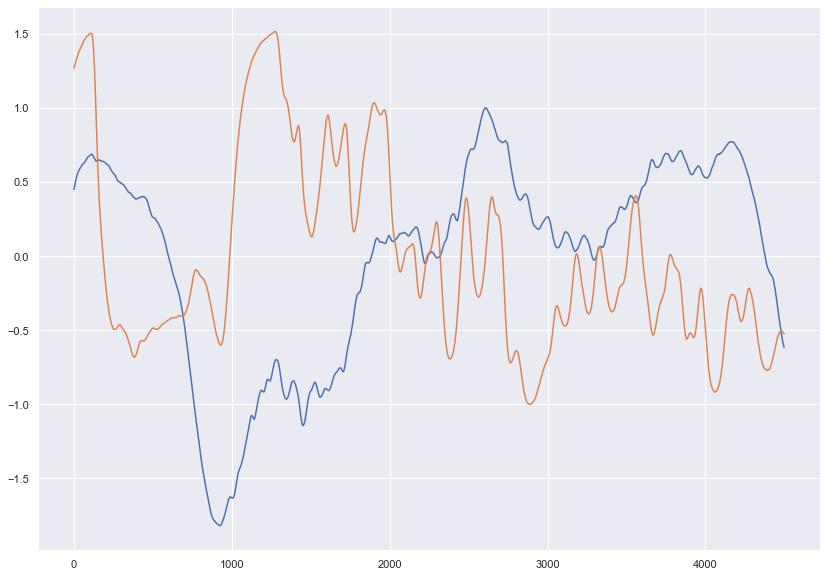

In [122]:
W, Vl, Vr = scipy.linalg.eig(A, left=True) # get left eigenvectors if A (Vl)
# project time serires onto top left eigenvector of A
y = np.zeros(L) # y is new time seriest
v = Vl[:,0].T # top left eigenvector of A
for i in range(L):
    y[i] = v @ sig[i:i+r]

# plot y and compare to neuron response  
plt.plot(normalize(y))
plt.plot(resPH_norm[::down][:L]*-1)
plt.show()

In [106]:
Vl.shape

(4, 4)